# <center style="background-color:#05445E;color: white; vertical-align: middle; padding:20px 5px;"> Library Importing</center>

In [1]:
from tensorflow import keras

from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import FastICA
from sklearn.decomposition import PCA

import matplotlib.pyplot as plt
import plotly.express as px


import numpy as np
import os

from Models.Autoencoder import Compile_model,Train_model
from Models.Tsne_and_plot import T_sne_train_or_load,plot_Tsne



# <center style="background-color:#05445E;color: white; vertical-align: middle; padding:20px 5px;"> Import and normalize data</center>

In [2]:
(x_train, y_train_), (x_val, y_val_) = keras.datasets.mnist.load_data()

x_train = np.expand_dims(x_train, -1).astype("float32") / 255
x_val = np.expand_dims(x_val, -1).astype("float32") / 255

x_train_flatt = np.reshape(x_train, (60000,784)) 

# <center style="background-color:#05445E;color: white; vertical-align: middle; padding:20px 5px;"> Dimensionality Reduction</center>

## <center style="background-color:#89B6A5;color: white; vertical-align: middle; padding:5px 5px;"> Keras Autoencoder model</center>

In [3]:
Encoder,Decoder,Autoencoder= Compile_model(input_shape=(28, 28,1),code_size=9)
_,my_history=Train_model(Autoencoder,x_train,x_train,x_val,x_val)

Loaded weights!


2022-05-10 02:55:55.177903: E tensorflow/stream_executor/cuda/cuda_driver.cc:271] failed call to cuInit: CUDA_ERROR_NO_DEVICE: no CUDA-capable device is detected
2022-05-10 02:55:55.177932: I tensorflow/stream_executor/cuda/cuda_diagnostics.cc:156] kernel driver does not appear to be running on this host (UB): /proc/driver/nvidia/version does not exist
2022-05-10 02:55:55.178679: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
XT_AE_9=Encoder.predict(x_train)
x_test_predicted=Decoder.predict(XT_AE_9)


2022-05-10 02:55:57.657947: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.
2022-05-10 02:56:03.880087: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 188160000 exceeds 10% of free system memory.


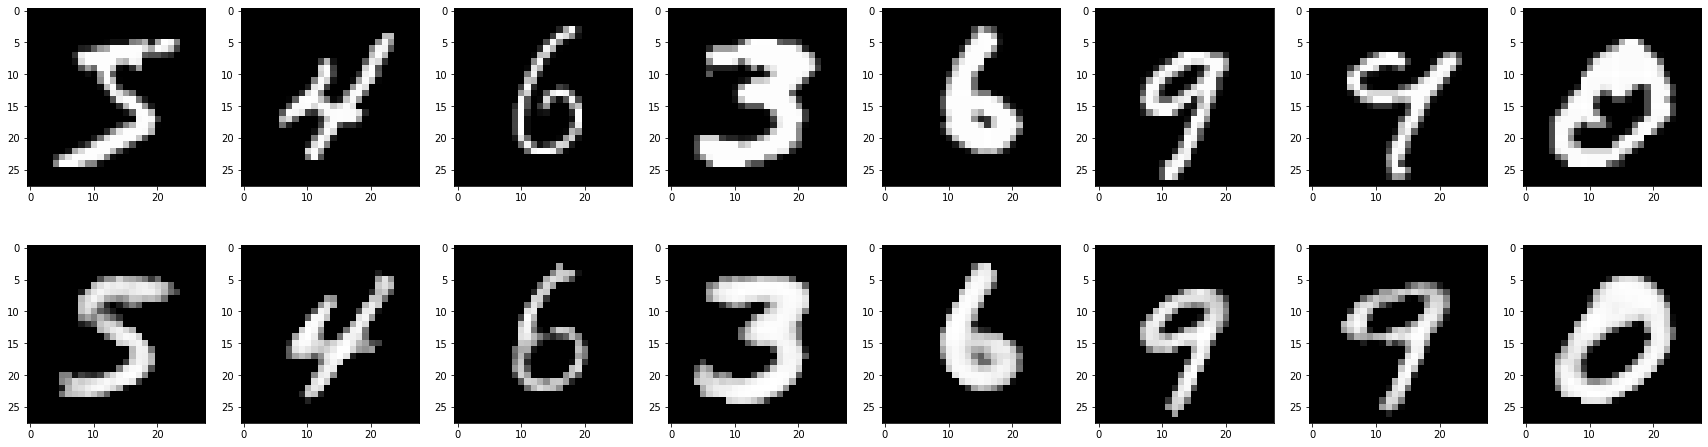

In [5]:
f, axarr = plt.subplots(2,8) 
plt.gcf().set_size_inches(30, 8)
for i in range(0,8):
    axarr[0][i].imshow(x_train[i*9], cmap='gray')
    axarr[1][i].imshow(x_test_predicted[i*9][...,0], cmap='gray')



## <center style="background-color:#89B6A5;color: white; vertical-align: middle; padding:5px 5px;"> ICA(Sklearn FastICA)</center>

In [7]:
%%time
FastICA_9 = FastICA(n_components=9,random_state=0)
XT_FastICA_9 = FastICA_9.fit_transform(x_train_flatt)

KeyboardInterrupt: 

## <center style="background-color:#89B6A5;color: white; vertical-align: middle; padding:5px 5px;">  PCA (Sklearn PCA)</center>

In [8]:
%%time
PCA_9 = PCA(n_components=9, svd_solver='full',random_state=0)
XT_PCA_9=PCA_9.fit(x_train_flatt)

CPU times: user 8.54 s, sys: 927 ms, total: 9.47 s
Wall time: 3.3 s


# <center style="background-color:#05445E;color: white; vertical-align: middle; padding:20px 5px;"> T-SNE</center>

## <center style="background-color:#89B6A5;color: white; vertical-align: middle; padding:5px 5px;">  After Autoencoder</center>

In [5]:
Tsne_data = T_sne_train_or_load('AE',XT_AE_9,2,90)

fig = plot_Tsne(Tsne_data,y_train_)
fig.show()

## <center style="background-color:#89B6A5;color: white; vertical-align: middle; padding:5px 5px;"> After ICA</center>

In [5]:
Tsne_data = T_sne_train_or_load('FastICA',XT_FastICA_9,2,90)


fig = plot_Tsne(Tsne_data,y_train_)
fig.show()

## <center style="background-color:#89B6A5;color: white; vertical-align: middle; padding:5px 5px;"> After PCA</center>

In [5]:
Tsne_data = T_sne_train_or_load('PCA',XT_PCA_9,2,90)

fig = plot_Tsne(Tsne_data,y_train_)
fig.show()